In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/admin/Downloads/online_retail.csv")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
unitprice_negative_row = df[df['UnitPrice']<0]
unitprice_negative_row

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2023-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2023-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [9]:
# removing -ve from untiprice
df = df[df['UnitPrice'] > 0]

In [10]:
unitprice_negative_row = df[df['UnitPrice']<0]
unitprice_negative_row

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [11]:
qty_neg_row = df[df['Quantity']<0]
qty_neg_row

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2023-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2023-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2023-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2023-12-09 11:58:00,1.25,17315.0,United Kingdom


In [34]:
# removing -ve from untiprice
df = df[df['Quantity'] > 0]

In [36]:
qty_neg_row = df[df['Quantity']<0]
qty_neg_row

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [119]:
# Remove cancelled invoices (starting with 'C')
df = df[~df['InvoiceNo'].str.startswith('C', na=False)]

In [121]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
df['CustomerID'].isnull().sum()

132603

In [13]:
df = df[df['CustomerID'].notna()]


In [14]:
df['CustomerID'].isnull().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406789 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406789 non-null  object 
 1   StockCode    406789 non-null  object 
 2   Description  406789 non-null  object 
 3   Quantity     406789 non-null  int64  
 4   InvoiceDate  406789 non-null  object 
 5   UnitPrice    406789 non-null  float64
 6   CustomerID   406789 non-null  float64
 7   Country      406789 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [16]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [46]:
# Exclude cancelled invoices (InvoiceNo starting with 'C')

cancelled_rows = df[df['InvoiceNo'].str.startswith('C', na=False)]
cancelled_rows


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


##**Exploratory data Analysis** **(EDA)**

In [53]:
# Analyze transaction volume by country

country_volume = df['Country'].value_counts().sort_values(ascending=False)
country_volume

Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


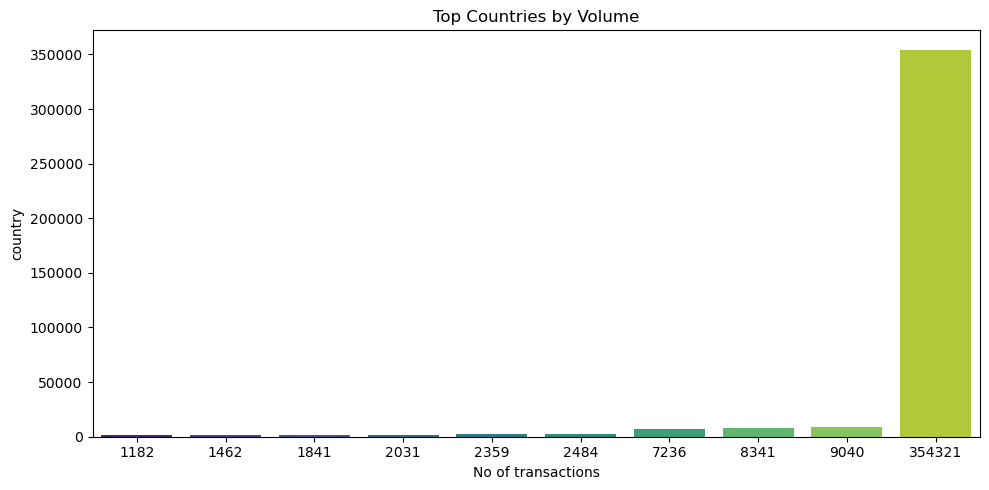

In [69]:
###plot for volume by contry

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


top_countries = country_volume.head(10)

plt.figure(figsize=(10,5))
sns.barplot( x=top_countries.values, y=top_countries, palette='viridis')
plt.title("Top Countries by Volume")
plt.xlabel("No of transactions")
plt.ylabel("country")
plt.tight_layout()
plt.show()

In [63]:
# Identify top-selling products

df['Revenue']= df['Quantity']*df['UnitPrice']

In [67]:
top_sel_prod = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)
top_sel_prod

Description
PAPER CRAFT , LITTLE BIRDIE           168469.600
REGENCY CAKESTAND 3 TIER              142592.950
WHITE HANGING HEART T-LIGHT HOLDER    100448.150
JUMBO BAG RED RETROSPOT                85220.780
MEDIUM CERAMIC TOP STORAGE JAR         81416.730
                                         ...    
PURPLE FRANGIPANI HAIRCLIP                 0.850
VINTAGE BLUE TINSEL REEL                   0.840
SET 12 COLOURING PENCILS DOILEY            0.650
HEN HOUSE W CHICK IN NEST                  0.420
PADS TO MATCH ALL CUSHIONS                 0.003
Name: Revenue, Length: 3877, dtype: float64

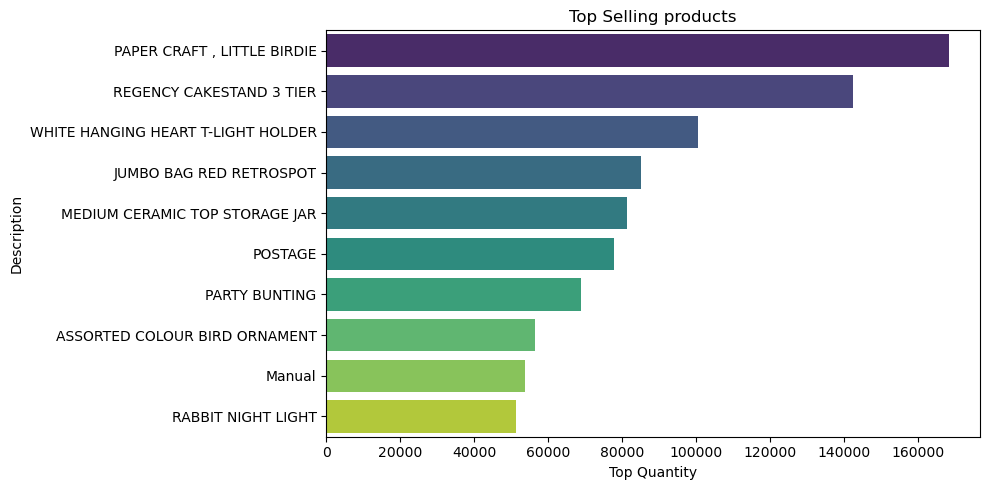

In [75]:
##plotting for top selling product

plt.figure(figsize=(10,5))
sns.barplot(x=top_sel_prod.head(10).values ,y=top_sel_prod.head(10).index, palette='viridis')
plt.title("Top Selling products")
plt.xlabel("Top Quantity")
plt.ylabel("Description")
plt.tight_layout()
plt.show()

In [79]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [83]:
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['Revenue'].sum()


In [87]:
monthly_sales = df.resample('M', on = 'InvoiceDate')['Revenue'].sum()

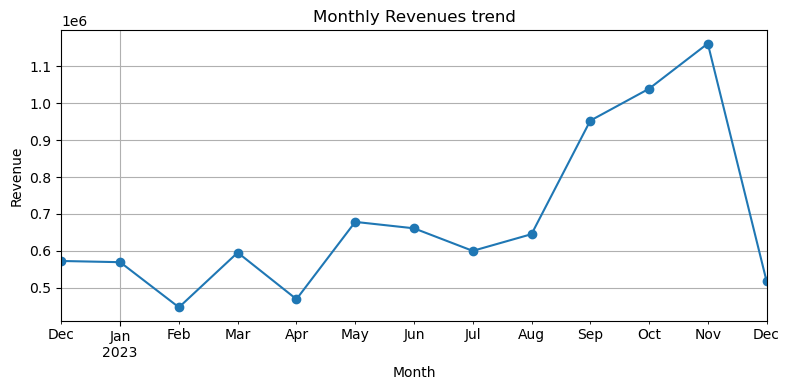

In [95]:
# Visualize purchase trends over time

plt.figure(figsize=(8,4))
monthly_sales.plot(marker='o')
plt.title("Monthly Revenues trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


In [107]:
Transaction_revenue = df.groupby('InvoiceNo')['Revenue'].sum()
Transaction_revenue

InvoiceNo
536365    139.12
536366     22.20
536367    278.73
536368     70.05
536369     17.85
           ...  
581583    124.60
581584    140.64
581585    329.05
581586    339.20
581587    249.45
Name: Revenue, Length: 18532, dtype: float64

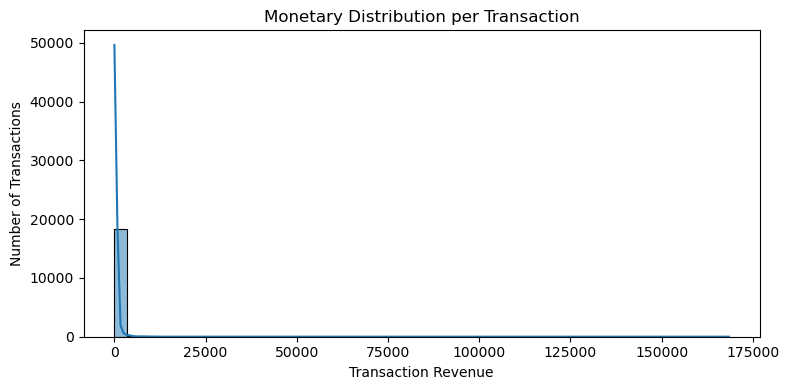

In [117]:
# Inspect monetary distribution per transaction and customer

plt.figure(figsize=(8,4))
sns.histplot(Transaction_revenue, bins=50, kde=True)
plt.title('Monetary Distribution per Transaction')
plt.xlabel('Transaction Revenue')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

In [123]:
#  we set reference date to one day after the last purchase

reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)



In [125]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency using last purchase date
    'InvoiceNo': 'nunique',                                     # Frequency
    'Revenue': 'sum'                                            # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.astype({'Recency': int, 'Frequency': int, 'Monetary': float})


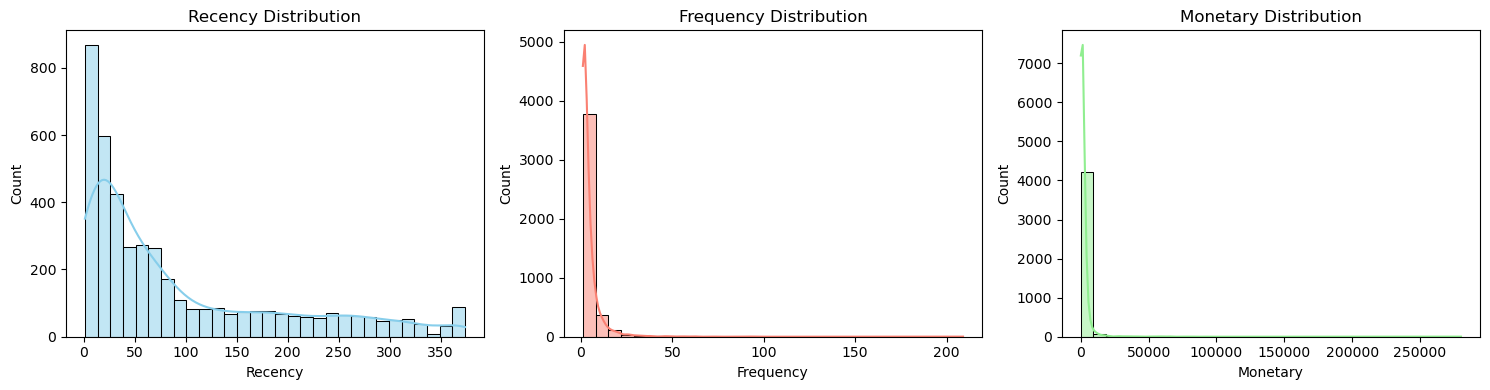

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(rfm['Recency'],bins=30,kde=True,color='skyblue')
plt.title("Recency Distribution")

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'],bins=30,kde=True,color='salmon')
plt.title("Frequency Distribution")

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'],bins=30,kde=True,color='lightgreen')
plt.title("Monetary Distribution")

plt.tight_layout()
plt.show()
             

In [142]:
from sklearn.preprocessing import StandardScaler

rfm_data = rfm[['Recency','Frequency','Monetary']]

scaler = StandardScaler()
rfm_sclaed = scaler.fit_transform(rfm_data)


In [152]:
from sklearn.cluster import KMeans
cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(rfm_sclaed )
    cs.append(kmeans.inertia_)



In [265]:
kmeans

KMeans(max_iter=100, n_clusters=10, n_init=10, random_state=0)

In [267]:
kmeans.inertia_

1283.0387165896213

In [279]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(rfm_sclaed)

KMeans(n_clusters=4, random_state=0)

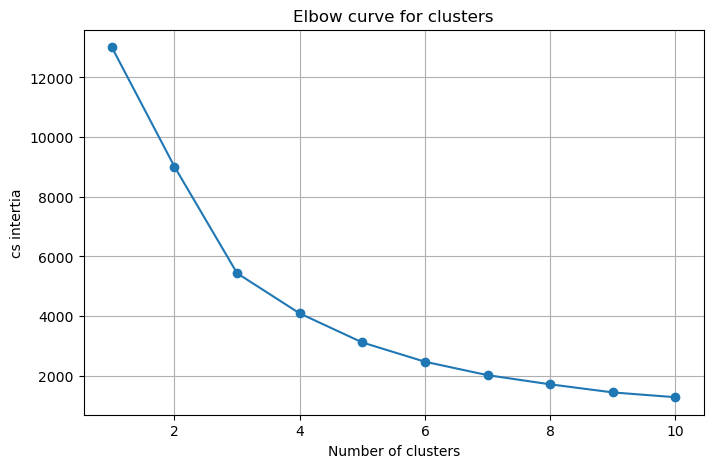

In [281]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),cs,marker='o')
plt.title("Elbow curve for clusters")
plt.xlabel("Number of clusters")
plt.ylabel("cs intertia")
plt.grid()
plt.tight_layout
plt.show()

In [283]:
rfm_sclaed

array([[ 2.33457414e+00, -4.25096503e-01,  8.35866818e+00],
       [-9.05340320e-01,  3.54416797e-01,  2.50966264e-01],
       [-1.75359593e-01, -3.53398530e-02, -2.85960063e-02],
       ...,
       [-8.45341904e-01, -2.95177619e-01, -2.08742313e-01],
       [-8.85340848e-01,  1.52368675e+00,  4.51854273e-03],
       [-4.95351144e-01, -1.65258736e-01, -2.41412739e-02]])

In [285]:
rfm['Cluster'].value_counts()

Cluster
0    3054
1    1067
3     204
2      13
Name: count, dtype: int64

In [287]:
cluster_profiles = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
cluster_profiles


,Recency,Frequency,Monetary
Cluster,,,
0,43.7,3.7,1359.0
1,248.1,1.6,480.6
2,7.4,82.5,127338.3
3,15.5,22.3,12709.1


In [289]:
rfm['Cluster'].value_counts().sort_index()


Cluster
0    3054
1    1067
2      13
3     204
Name: count, dtype: int64

In [291]:
# mapping actual cluster_profiles 
cluster_map = {
    0: 'High-Value',
    1: 'Regular',
    2: 'Occasional',
    3: 'At-Risk'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_map)


In [293]:
rfm['Segment'].value_counts()


Segment
High-Value    3054
Regular       1067
At-Risk        204
Occasional      13
Name: count, dtype: int64

In [295]:
rfm[['Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment']].tail(30)


,Recency,Frequency,Monetary,Cluster,Segment
CustomerID,,,,,
18242.0,72,4,2232.49,0,High-Value
18245.0,7,7,2567.06,0,High-Value
18246.0,24,2,596.10,0,High-Value
18248.0,123,2,804.02,0,High-Value
18249.0,17,1,95.34,0,High-Value
18250.0,310,1,349.27,1,Regular
18251.0,87,1,4314.72,0,High-Value
18252.0,51,2,526.67,0,High-Value
18255.0,89,1,103.30,0,High-Value


In [261]:
##silhouette_score

from sklearn.metrics import silhouette_score

silhouette_scores=[]

for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=100,random_state=0)
    label=kmeans.fit_transform(rfm_sclaed)
    score=(silhouette_scores,rfm_sclaed)
    silhouette_scores.append(score)



In [277]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_sclaed)


score = silhouette_score(rfm_sclaed, rfm['Cluster'])
print(f"Silhouette Score: {score:.4f}")



Silhouette Score: 0.6162


In [377]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

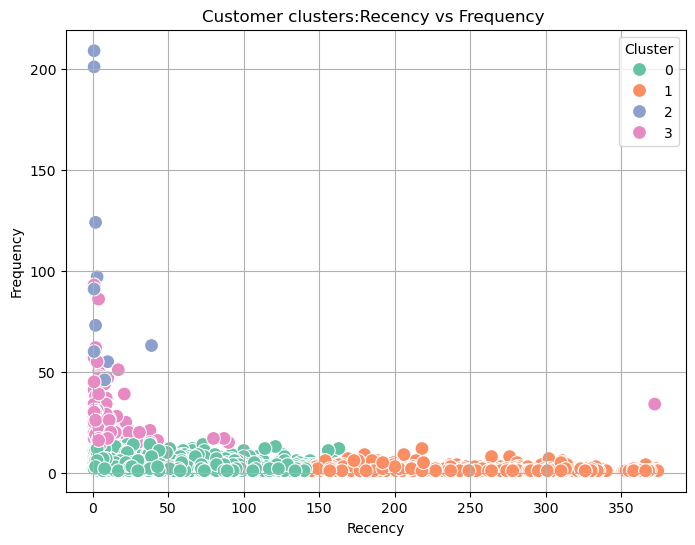

In [297]:
###visualize the clusters

import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data= rfm, x='Recency', y= 'Frequency',hue='Cluster',palette='Set2',s=100)
plt.title("Customer clusters:Recency vs Frequency ")
plt.grid(True)
plt.show()

In [301]:
rfm.to_csv('rfm_clustered.csv',index=False)

In [303]:
# Create a matrix: rows = CustomerID, columns = Product (Description), values = Quantity

customer_product_matrix = df.pivot_table( index='CustomerID',columns='StockCode',values= 'Quantity', aggfunc='sum',fill_value=0)

In [355]:
# cosine_similarity

from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(customer_product_matrix.T)

item_similarity_df = pd.DataFrame(item_similarity, index=customer_product_matrix.columns, columns=customer_product_matrix.columns)

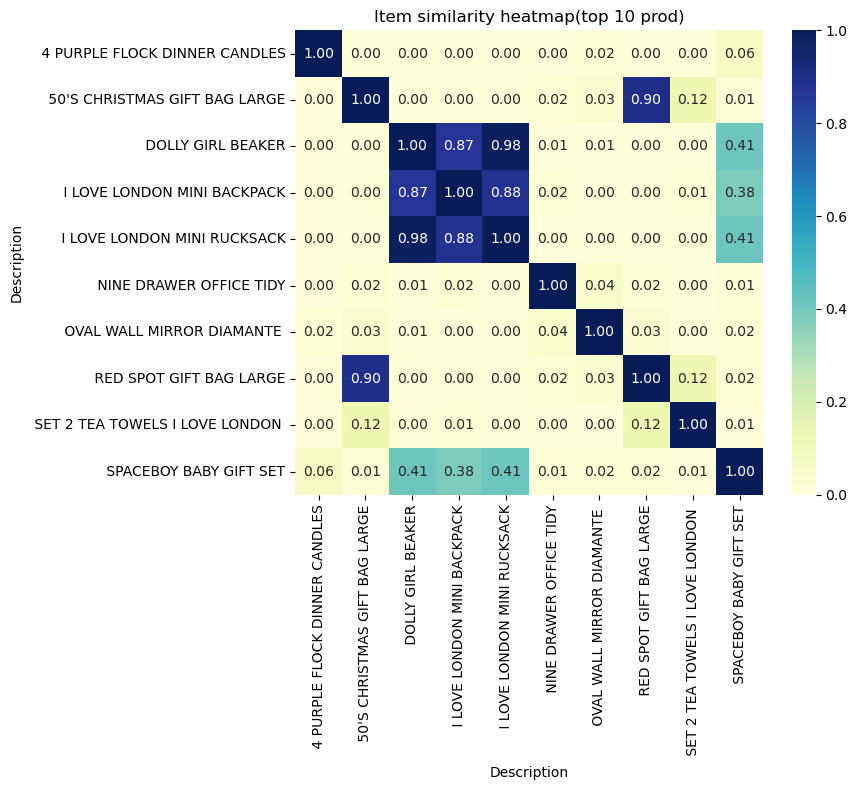

In [357]:
 # Plot Heatmap of Product Similarities
top_products = item_similarity_df.columns[:10]
subset = item_similarity_df.loc[top_products, top_products]

plt.figure(figsize=(9,8))
sns.heatmap(subset, cmap='YlGnBu',annot=True, fmt=".2f")
plt.title("Item similarity heatmap(top 10 prod)")
plt.tight_layout()
plt.show()

In [359]:
def recommend_products(product_code,top_n=5):
    if product_code not in item_similarity_df.columns :
        return f"product (product_code) not found in data."

    similar_items = item_similarity_df[product_code].sort_values(ascending=False)
    return similar_items[1, top_n+1]
    

In [351]:
df['Description'].unique()[:10]

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER',
       'KNITTED UNION FLAG HOT WATER BOTTLE',
       'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES',
       'GLASS STAR FROSTED T-LIGHT HOLDER', 'HAND WARMER UNION JACK',
       'HAND WARMER RED POLKA DOT', 'ASSORTED COLOUR BIRD ORNAMENT'],
      dtype=object)

In [365]:
df['StockCode'].nunique()


3665

In [367]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [371]:
cleaned_df = df.copy()
cleaned_df.to_csv("cleaned_dta.csv", index=False)

In [373]:
df['Description'] = df['Description'].astype(str)